<a href="https://colab.research.google.com/github/zaiddkhan/predict_stock_prices/blob/main/predicting_stock_market_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf

In [ ]:
stock_data = yf.download('DAC',start='2014-02-21',end='2024-02-21')
stock_data

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,DAC,DAC,DAC,DAC,DAC
Date,,,,,
2014-02-21,76.762558,78.712088,75.178569,75.544110,1179
2014-02-24,77.981026,78.712101,75.422278,76.884416,2021
2014-02-25,77.006264,78.468408,75.422274,77.981022,1571
2014-02-26,77.493637,78.102861,75.544114,77.737327,1600
2014-02-27,76.031502,77.737336,74.081978,76.762571,2164
...,...,...,...,...,...
2024-02-13,73.291374,74.253056,72.825111,73.815926,110400
2024-02-14,70.493782,72.805688,69.959515,70.571495,189800


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
scaled_data = scaler.fit_transform(stock_data['Close'].values.reshape(-1,1))

In [ ]:
import numpy as np
def create_dataset(data,time_step):
  x,y = [],[]
  for i in range(len(data) - time_step - 1):
    x.append(data[i:(i+time_step),0])
    y.append(data[i+time_step,0])
  return np.array(x),np.array(y)

In [ ]:
time_step = 100

X,y = create_dataset(scaled_data,time_step)


In [ ]:
train_size = 0.8

In [ ]:
x_train,x_test  = X[:int(X.shape[0]*train_size)],X[int(X.shape[0]*train_size):]
y_train,y_test = y[:int(y.shape[0]*train_size)],y[int(y.shape[0]*train_size):]

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM


model = Sequential()
model.add(LSTM(64,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(64))
model.add(Dense(64))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam',loss="mean_squared_error")
model.fit(x_train,y_train,epochs=10,batch_size=64)

Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 122ms/step - loss: 0.0618
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 157ms/step - loss: 0.0019
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - loss: 0.0013
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - loss: 0.0010
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - loss: 0.0011
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - loss: 0.0011
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step - loss: 8.7467e-04
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step - loss: 9.7915e-04
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - loss: 9.6727e-04
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 157ms/step - loss: 8.1422e-04


In [ ]:
test_loss = model.evaluate(x_test,y_test)
test_loss

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0016


0.0009041894227266312

In [ ]:
prediction = model.predict(x_test)
prediction = scaler.inverse_transform(prediction)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


In [ ]:
prediction

array([[83.23158 ],
       [84.86068 ],
       [86.53417 ],
       [88.06117 ],
       [89.39588 ],
       [90.46548 ],
       [91.18037 ],
       [91.60747 ],
       [91.998634],
       [92.31223 ],
       [92.45929 ],
       [92.43235 ],
       [92.40083 ],
       [91.94815 ],
       [90.96836 ],
       [89.539345],
       [87.95165 ],
       [86.33266 ],
       [84.6193  ],
       [82.94214 ],
       [81.51403 ],
       [80.372635],
       [79.712494],
       [79.49272 ],
       [79.40091 ],
       [79.1529  ],
       [78.616394],
       [77.58694 ],
       [76.24335 ],
       [75.12403 ],
       [74.25013 ],
       [73.56276 ],
       [73.0757  ],
       [72.942   ],
       [73.231926],
       [73.702736],
       [74.131775],
       [74.182724],
       [74.077255],
       [73.730896],
       [73.16491 ],
       [72.64748 ],
       [72.31355 ],
       [71.9577  ],
       [71.34142 ],
       [70.855156],
       [70.670296],
       [70.773   ],
       [71.008804],
       [71.29768 ],


In [ ]:
original_data = stock_data['Close'].values
predicted_data = np.empty_like(original_data)
predicted_data[:] = np.nan
predicted_data[-len(prediction):] = prediction.reshape(-1,1)

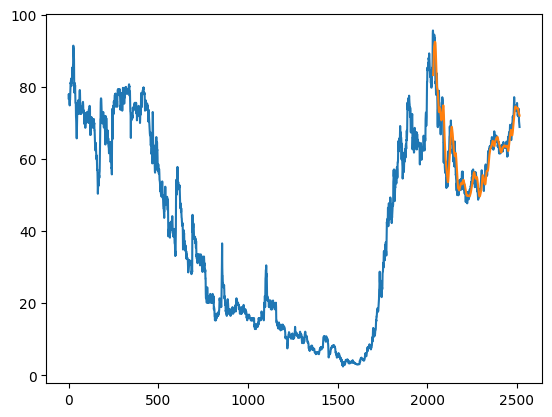

In [ ]:
import matplotlib.pyplot as plt
plt.plot(original_data)
plt.plot(predicted_data)

In [ ]:
new_predictions = model.predict(x_test[-90:])
new_predictions = scaler.inverse_transform(new_predictions)
predicted_data = np.append(predicted_data,new_predictions)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


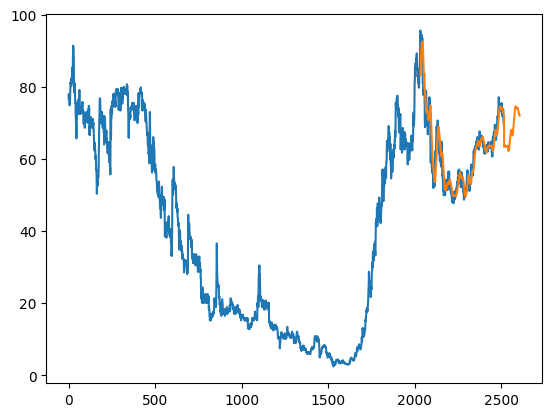

In [ ]:
plt.plot(original_data)
plt.plot(predicted_data)